In [43]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [44]:
data_qlearning = {}
data_fixed = {}

with open("data & animations/qlearning False x.json", "r") as f:
    data_qlearning = json.load(f)

with open("data & animations/fixed True.json", "r") as f:
    data_fixed = json.load(f)

t = [i for i in range(2000)]

def plot4(val, axs):
    axs[0, 0].plot(t, data_qlearning["semaforo_data"][0][val], color="#FF8C00")
    axs[0, 0].plot(t, data_fixed["semaforo_data"][0][val], color="#4169E1")

    axs[0, 1].plot(t, data_qlearning["semaforo_data"][1][val], color="#FF8C00")
    axs[0, 1].plot(t, data_fixed["semaforo_data"][1][val], color="#4169E1")

    axs[1, 1].plot(t, data_qlearning["semaforo_data"][2][val], color="#FF8C00")
    axs[1, 1].plot(t, data_fixed["semaforo_data"][2][val], color="#4169E1")

    axs[1, 0].plot(t, data_qlearning["semaforo_data"][3][val], color="#FF8C00")
    axs[1, 0].plot(t, data_fixed["semaforo_data"][3][val], color="#4169E1")

def set_labels4(axs, label):
    axs[0, 0].set_ylabel(label)
    axs[1, 0].set_ylabel(label)

    axs[1, 1].set_xlabel("time")
    axs[1, 0].set_xlabel("time")

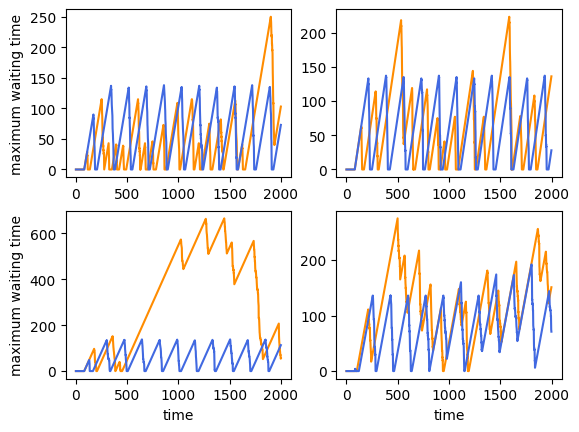

In [45]:
# Maximum wait time per street over time

fig, axs = plt.subplots(2, 2)
val = "max_wait_times"

plot4(val, axs)
set_labels4(axs, "maximum waiting time")

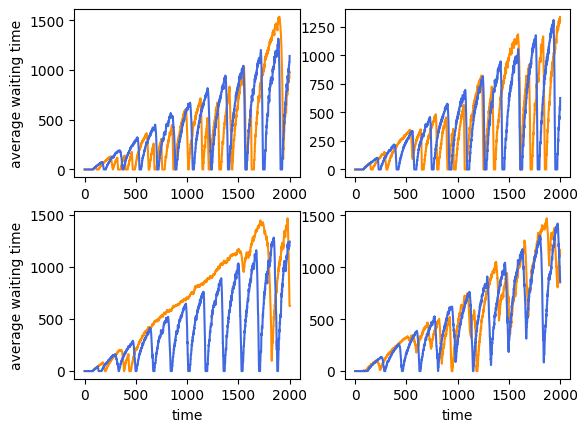

In [46]:
# Average wait time per street over time

fig, axs = plt.subplots(2, 2)
val = "avg_wait_times"

plot4(val, axs)
set_labels4(axs, "average waiting time")

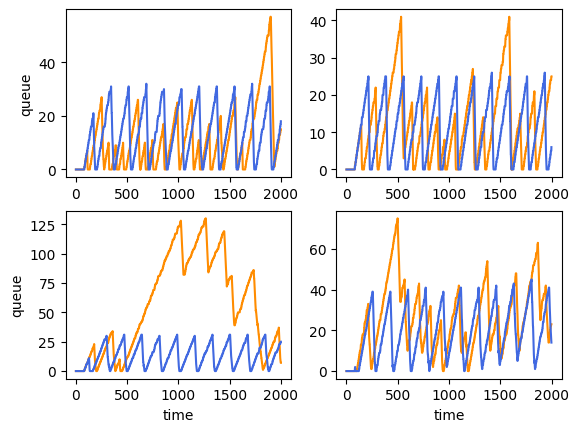

In [47]:
# Queue per street over time

fig, axs = plt.subplots(2, 2)
val = "queues"

plot4(val, axs)
set_labels4(axs, "queue")

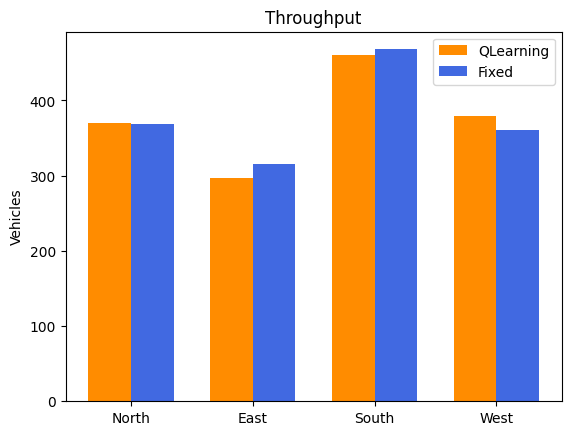

In [48]:
labels = ["North", "East", "South", "West"]
fixed_tp = [smf["total_tp"] for smf in data_fixed["semaforo_data"]]
qlearning_tp = [smf["total_tp"] for smf in data_qlearning["semaforo_data"]]

x = np.arange(len(labels))  # positions for groups
width = 0.35                # width of each bar

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, qlearning_tp, width, label="QLearning", color="#FF8C00")
rects2 = ax.bar(x + width/2, fixed_tp, width, label="Fixed", color="#4169E1")

ax.set_ylabel("Vehicles")
ax.set_title("Throughput")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Text(0.5, 1.0, 'Throughput')

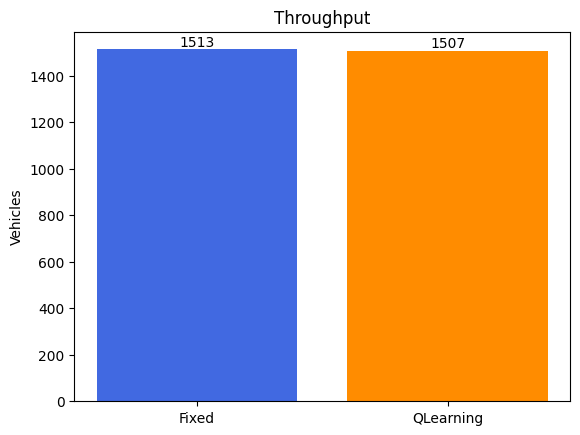

In [49]:
values = [sum(fixed_tp), sum(qlearning_tp)]
labels = ["Fixed", "QLearning"]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=["#4169E1", "#FF8C00"])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
        height,                             # y position (top of bar)
        f"{height}",                        # text (the value)
        ha="center", va="bottom"            # alignment
    )

plt.ylabel("Vehicles")
plt.title("Throughput")